In [5]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

from connectivity import constants as const
from connectivity.savio_scripts import script_ridge_mk as run
from connectivity import visualize_summary as vis_summary


# %load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [ ]:
# clear connect files
run.delete_conn_files()

In [10]:
# train and validate ridge model(s)

# split subjects into train and hold out
train_subjs, hold_out_subjs = run.split_subjects(const.return_subjs)

for exp in ['sc1', 'sc2']:
    run.train_ridge(log_alpha=[0,2,4],  # 0,2,4,6,8,10
                    subj_id=train_subjs, 
                    train_exp=exp)


training alpha 0
Training model on s02
Training model on s03
Training model on s09
Training model on s10
Training model on s12
Training model on s15
Training model on s17
Training model on s18
Training model on s19
Training model on s20
Training model on s24
Training model on s25
Training model on s27
Training model on s28
Training model on s29
Training model on s30
Training model on s31
tracking experiment


psutil is not installed. You will not be able to abort this experiment from the UI.
psutil is not installed. Hardware metrics will not be collected.


https://ui.neptune.ai/maedbhking/connectivity/e/CON-26
training alpha 2
Training model on s02
Training model on s03
Training model on s09
Training model on s10
Training model on s12
Training model on s15
Training model on s17
Training model on s18
Training model on s19
Training model on s20
Training model on s24
Training model on s25
Training model on s27
Training model on s28
Training model on s29
Training model on s30
Training model on s31
tracking experiment


psutil is not installed. You will not be able to abort this experiment from the UI.
psutil is not installed. Hardware metrics will not be collected.


https://ui.neptune.ai/maedbhking/connectivity/e/CON-27
training alpha 4
Training model on s02
Training model on s03
Training model on s09
Training model on s10
Training model on s12
Training model on s15
Training model on s17
Training model on s18
Training model on s19
Training model on s20
Training model on s24
Training model on s25
Training model on s27
Training model on s28
Training model on s29
Training model on s30
Training model on s31
tracking experiment


psutil is not installed. You will not be able to abort this experiment from the UI.
psutil is not installed. Hardware metrics will not be collected.


https://ui.neptune.ai/maedbhking/connectivity/e/CON-28
training alpha 0
Training model on s02
Training model on s03
Training model on s09
Training model on s10
Training model on s12
Training model on s15
Training model on s17
Training model on s18
Training model on s19
Training model on s20
Training model on s24
Training model on s25
Training model on s27
Training model on s28
Training model on s29
Training model on s30
Training model on s31
tracking experiment


psutil is not installed. You will not be able to abort this experiment from the UI.
psutil is not installed. Hardware metrics will not be collected.


https://ui.neptune.ai/maedbhking/connectivity/e/CON-29
training alpha 2
creating /Users/maedbhking/Documents/cerebellum_connectivity/data/sc2/conn_models/train/ridge_tesselsWB162_alpha_2
Training model on s02
Training model on s03
Training model on s09
Training model on s10
Training model on s12
Training model on s15
Training model on s17
Training model on s18
Training model on s19
Training model on s20
Training model on s24
Training model on s25
Training model on s27
Training model on s28
Training model on s29
Training model on s30
Training model on s31
tracking experiment


psutil is not installed. You will not be able to abort this experiment from the UI.
psutil is not installed. Hardware metrics will not be collected.


https://ui.neptune.ai/maedbhking/connectivity/e/CON-30
training alpha 4
creating /Users/maedbhking/Documents/cerebellum_connectivity/data/sc2/conn_models/train/ridge_tesselsWB162_alpha_4
Training model on s02
Training model on s03
Training model on s09
Training model on s10
Training model on s12
Training model on s15
Training model on s17
Training model on s18
Training model on s19
Training model on s20
Training model on s24
Training model on s25
Training model on s27
Training model on s28
Training model on s29
Training model on s30
Training model on s31
tracking experiment


psutil is not installed. You will not be able to abort this experiment from the UI.
psutil is not installed. Hardware metrics will not be collected.


https://ui.neptune.ai/maedbhking/connectivity/e/CON-31


<Figure size 576x576 with 0 Axes>

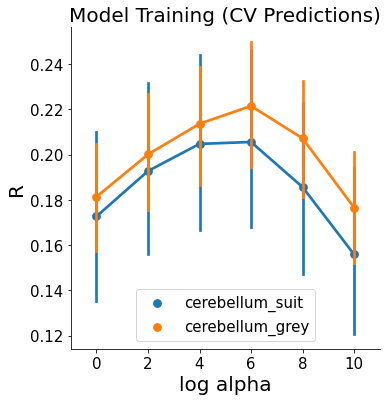

In [11]:
# plot alpha curve for train CVs

df = vis_summary.train_summary()

vis_summary.plot_train_predictions(dataframe=df, hue='train_Y_data');


In [ ]:
# evaluate ridge model(s)

resolution = 'tesselsWB162'

# split subjects into train and hold out
train_subjs, hold_out_subjs = run.split_subjects(const.return_subjs)

for exp in range(2):
    run.eval_ridge(log_alpha=[6], 
                   resolution=resolution, 
                   subj_id=train_subjs, 
                   train_exp=f'sc{2-exp}', 
                   eval_exp=f'sc{exp+1}')
    

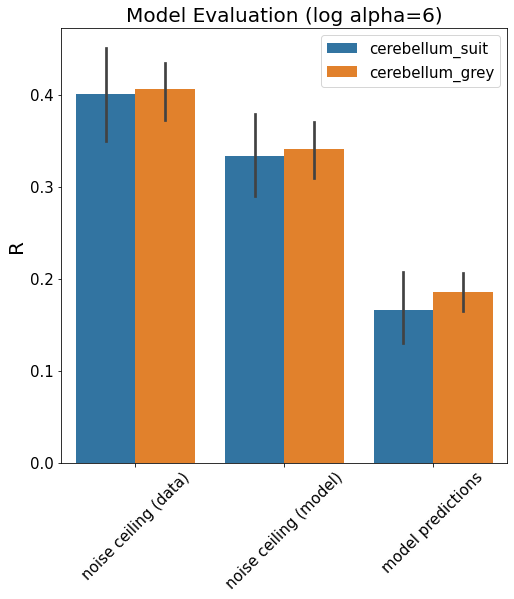

In [12]:
# Model evaluation (noise ceiling and predictions)

df_eval = vis_summary.eval_summary()

vis_summary.plot_eval_predictions(dataframe=df_eval, best_alpha=6, hue='eval_Y_data')


In [14]:
# plot model weights

df = vis_summary.get_train_weights(model_name='ridge_tesselsWB162_alpha_6')


In [ ]:
vis_summary.plot_train_weights(dataframe=df, hue='exp')